## Introduction

Entropy in Thermodynamics is a measure of a system's disorder: the higher the disorder, the greater the entropy. Information can also be seen as a form of entropic measure. Information that is "unordered", that is, which is highly uncertain, presents us with more surprise than well-established, organized facts. It is hence more informative. As we will see, Information Theory has concepts very reminiscent of Thermodynamic's Second Law. 

It is also of interest to note that such concepts of Thermodynamics such as the Gibbs Free Energy (the enthalpy minus the product of the temperature and a system's entropy) have corresponding properties, quantities and concepts in Information Theory. And this is not by chance, as the arrangement and the evolution of of the state of matter conveys information and, ultimately, tweaking with matter is the way to convey information. Think about the way digital information is relayed. In its most standard incarnation, it is transmitted via fluctuations in electromagnetic waves. These waves are modulated to transmit data.

However, that is not the end of it. Information Theory finds its way also in Machine Learning. Machine Learning is the science of finding patterns, of trying to elicit information from that which we observe. I did not use the word information by chance, as the role of models, independent variables, and parameter estimation (in the traditional sense of maximum-likelihood estimation) is to obtain from a complex observation its essentials for prognostics, prediction, clustering, and a myriad of other applications.

In what follows, we will explore one very interesting quantity: the cross entropy. We will see that its main virtue is to compare a model to experimental data and to tell how much excess information is required for modeling data with a probability distribution different to the true ditribution of the data. 

## Entropy as a Measure of Uncertainty

In order to understand cross entropy, we must first lay out the foundations of entropy. Entropy is a description of the uncertainty of a random variable (RV). We want to measure how uncertain a probabilistic event is. Essentially, the more unlikely an event is, the more surprising it is and, consequently, the more information it holds. To say that it is raining now contains no information. It is a certain event that bears no surprise. However, to say that there is a $35$% probability of rain tomorrow does contain information. If we instead were faced with a probability of $50$% rain, would we be more or less certain of tomorrow's weather? Indeed we would be less certain, because the $35$% probability of rain implies a probability of $65$% without any rain, whilst $50$% either way essentially leaves with the most amount of doubt possible. This is an essential aspect of entropy: it is maximized for equally-likely events. Another elucidating example is a biased die and a fair die. Let us imagine that the biased die is heavily biased towards the six-dotted side such that for this die's events $\{1,2,3,4,5,6\}$, the corresponding set of probabilities is given by $\{ \frac{1}{12},\frac{1}{12},\frac{1}{12},\frac{1}{12},\frac{1}{12}, \frac{7/12} \}$ . The fair die, on the other hand, follows the traditional distribution $\{\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6},\frac{1}{6} \}$. If you were to gamble, which die would you pick? Which one makes you less uncertain of your choice, or, better still, which one decreases the entropy you experience? Evidently, it is **not** the fair die, for, once again, uniform distributions maximize entropy. 

As we can see, there is a relationship between the probability of a RV's events and its entropy. Let $X$ be a random variable, $\mathcal{X}$ its support group, and let $H(X)$ its entropy. The entropy is defined as
$\begin{equation}
    H(X) = \sum\limits_{x \in \mathcal{X}} p_X (x) log_2\left( \frac{1}{p_X (x)} \right)
\end{equation}$

## Kullback-Leibler Divergence: The Distance Between Probability Density Functions

## Cross Entropy and its Relationship to KL Divergence

## Cross Entropy as a Cost Function in Machine Learning

In [429]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import string as string
import pprint

In [430]:
pp = pprint.PrettyPrinter(indent=4)

In [431]:
def entropy(p,eps):
    p = p+eps
    return -np.dot(p,np.log2(p))

In [432]:
def cross_entropy(p,q,eps):
    q = q+eps
    return -np.dot(p,np.log(q))

In [433]:
def kullback_leibler(p,q,eps):
    p = p+eps; q = q+eps
    return np.dot(p,np.log(p/q))

In [434]:
eps = 1e-15

In [435]:
nel = 100
p_list = np.linspace(0,1,nel+1)
p_set = [np.array([p, 1-p]) for p in p_list]
Hp = [entropy(value,eps) for value in p_set]
dic = {'P(x=1)':p_list, 'Hp':Hp}

Text(0.5, 1.0, 'Binary Entropy')

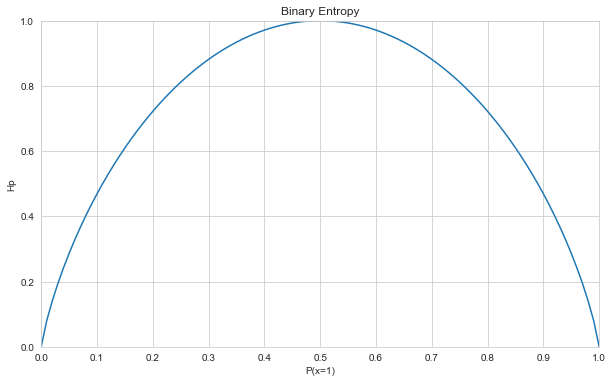

In [436]:
dfentropy = pd.DataFrame(dic)
sns.set_style("whitegrid")
fig_dims = (10, 6)
fig,ax = plt.subplots(figsize=fig_dims)
ax.set(xlim=(0,1), ylim=(0,1), xticks=np.linspace(0,1,11))
sns.lineplot(x="P(x=1)", y="Hp", ax=ax, data=dfentropy)
plt.title('Binary Entropy')

In [437]:
p = np.random.rand(10)
p /= p.sum()
cats = list(string.ascii_lowercase[:len(p)])
dic = {'Category':cats, 'Probability':p}
dist = pd.DataFrame(dic)

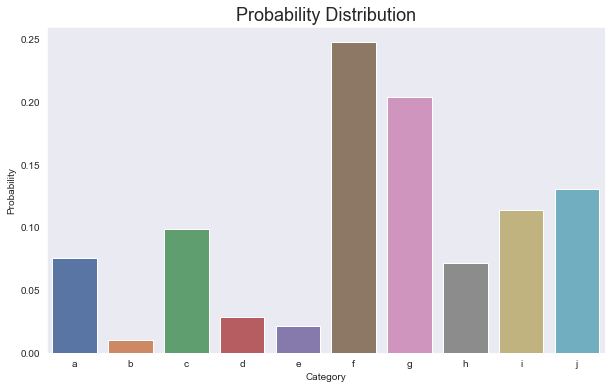

In [438]:
sns.set_style("dark")
fig_dims = (10, 6)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Category", y = "Probability", palette="deep", ax=ax, data=dist)
plt.title("Probability Distribution", size=18)
plt.show()

Writing a similar distribution to $\mathbf{p}$. Let us call it $\mathbf{q}$

In [439]:
q = p.copy()

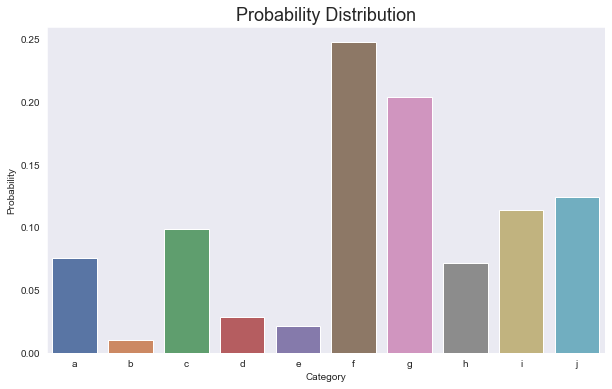

In [440]:
q[-1] = 0.95*p[-1]
dic = {'Category':cats, 'Probability':q}
dist = pd.DataFrame(dic)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Category", y = "Probability", palette="deep", ax=ax, data=dist)
plt.title("Probability Distribution", size=18)
plt.show()

Let us compute now the entropy of each distribution and their cross entropy

In [441]:
entropy(p,eps)

2.9168812123233385

In [442]:
entropy(q,eps)

2.906886141311938

In [443]:
H_pq = cross_entropy(p,q,eps)
print(H_pq)

2.028517611098632


Now choosing a completely random $\mathbf{q}$

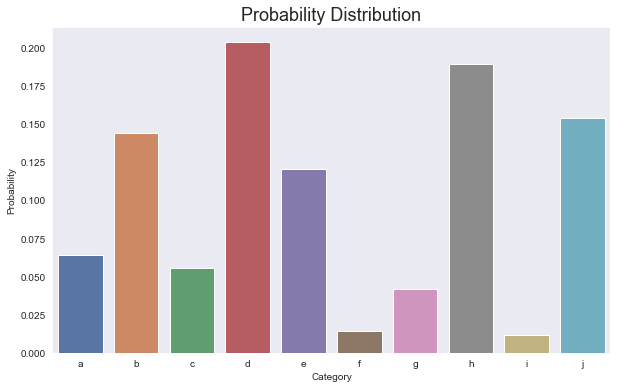

In [444]:
q = np.random.rand(10)
q = q/q.sum()
dic = {'Category':cats, 'Probability':q}
dist = pd.DataFrame(dic)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "Category", y = "Probability", palette="deep", ax=ax, data=dist)
plt.title("Probability Distribution", size=18)
plt.show()

In [445]:
H_pq = cross_entropy(p,q,eps)
print(H_pq)

3.1643656959100426


Now let us say that we use the Cross Entropy for the classification problem

The category $a$ is going to be chosen for RV $T$

In [446]:
q = np.zeros(10)
q[0] = 1
pp.pprint(q)

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


In [447]:
cross_entropy(p,q,eps)

31.942081767754154

If $\mathbf{p}$ were close to $\mathbf{q}$, then

In [448]:
p = np.array([0.985, 0.015, 0, 0, 0, 0, 0, 0, 0, 0])

In [449]:
cross_entropy(p,q,eps)

0.5180816459236591

In [450]:
nel = 99
p_list = np.linspace(0, 0.99, nel+1)
N = 8
p_set = [np.pad([p,1-p], (0,N), 'constant', constant_values=0) for p in p_list]
H_pq = [cross_entropy(value,q,eps) for value in p_set]
KL = [kullback_leibler(value,q,eps) for value in p_set]
dic_pq = {'P(x=1)':p_list, 'H_pq':H_pq}
dic_KL = {'P(x=1)':p_list, 'KL':KL}

Text(0.5, 1.0, 'Kullback-Leibler')

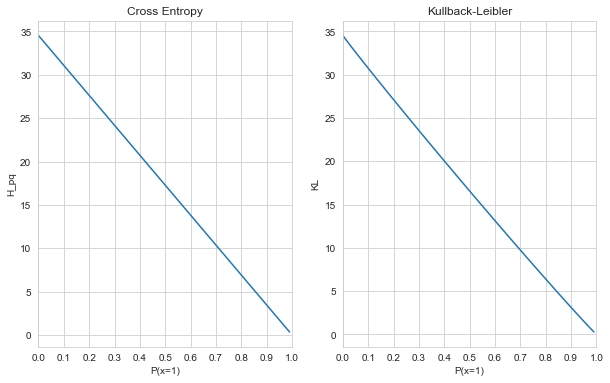

In [451]:
dfcross_entropy = pd.DataFrame(dic_pq)
dfkullback_leibler = pd.DataFrame(dic_KL)
sns.set_style("whitegrid")
fig_dims = (10, 6)
fig,ax =plt.subplots(1,2,figsize=fig_dims)
ax[0].set(xlim=(0,1), xticks=np.linspace(0,1,11))
sns.lineplot(x="P(x=1)", y="H_pq", data=dfcross_entropy, ax=ax[0])
ax[0].set_title('Cross Entropy')
ax[1].set(xlim=(0,1), xticks=np.linspace(0,1,11))
sns.lineplot(x="P(x=1)", y="KL", data=dfkullback_leibler, ax=ax[1])
ax[1].set_title('Kullback-Leibler')

In [452]:
dfcross_entropy.head()

,P(x=1),H_pq
0,0.00,34.538776
1,0.01,34.193389
2,0.02,33.848001
3,0.03,33.502613
4,0.04,33.157225
